In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel(r"./data/All People's Fantasy Football Results 2023.xlsx")
df.head()

,WEEK,TEAM,TEAM MANAGER,OPPONENT,OPPONENT MANAGER,TEAM SCORE,OPPONENT SCORE,RESULT
0,1,Hurts So Good(8-6-0),Clay Marquardt,Sacks in the City(8-6-0),Isac Kunnath,65.50,89.08,Loss
1,1,Justice for JK(6-8-0),Andrew Cafiero,Liverpool FC(8-6-0),Jack Hurt,61.64,106.06,Loss
2,1,*mugshot joke goes here*(8-6-0),Rick Kingsley,Clifton Commuters(6-8-0),Tongil Lee,128.12,123.74,Win
3,1,I miss Tom Brady(4-10-0),Tyler T,Franks Third Reich(8-6-0),Alan Thomas,108.84,120.34,Loss
4,1,Something Offensive(4-10-0),Josh Chen,Poor Men North of Richmond(8-6-0),Jordan Haimon,71.36,92.18,Loss


In [3]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df.head()

,week,team,team_manager,opponent,opponent_manager,team_score,opponent_score,result
0,1,Hurts So Good(8-6-0),Clay Marquardt,Sacks in the City(8-6-0),Isac Kunnath,65.50,89.08,Loss
1,1,Justice for JK(6-8-0),Andrew Cafiero,Liverpool FC(8-6-0),Jack Hurt,61.64,106.06,Loss
2,1,*mugshot joke goes here*(8-6-0),Rick Kingsley,Clifton Commuters(6-8-0),Tongil Lee,128.12,123.74,Win
3,1,I miss Tom Brady(4-10-0),Tyler T,Franks Third Reich(8-6-0),Alan Thomas,108.84,120.34,Loss
4,1,Something Offensive(4-10-0),Josh Chen,Poor Men North of Richmond(8-6-0),Jordan Haimon,71.36,92.18,Loss


In [4]:
quantiles = [q / 100 for q in range(0, 101, 20)]
for q in quantiles:
    num = df.team_score.quantile(q)
    print(f'the {int(q*100)}th quantile of scoring in 2023 was {num}')

the 0th quantile of scoring in 2023 was 56.44
the 20th quantile of scoring in 2023 was 91.952
the 40th quantile of scoring in 2023 was 102.68
the 60th quantile of scoring in 2023 was 114.12
the 80th quantile of scoring in 2023 was 128.168
the 100th quantile of scoring in 2023 was 164.32


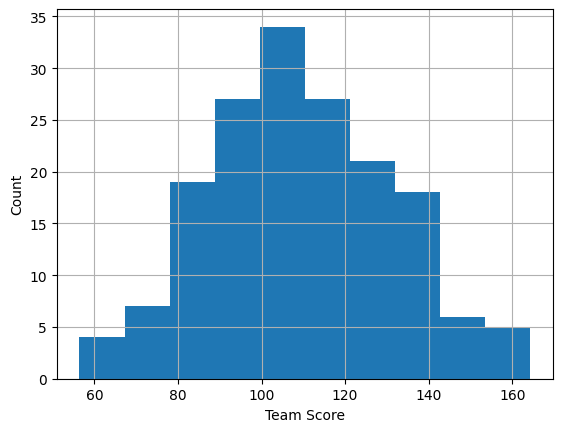

In [13]:
df.team_score.hist(bins=10)
plt.xlabel('Team Score')
plt.ylabel('Count')
plt.show()

In [24]:
print(df.team_score.describe())
df.team_score.median()

count    168.000000
mean     109.555357
std       21.854245
min       56.440000
25%       94.900000
50%      108.130000
75%      123.765000
max      164.320000
Name: team_score, dtype: float64


108.13

In [23]:
sd = df.team_score.describe()['std']
lower = df.team_score.describe()['mean'] - sd
upper = df.team_score.describe()['mean'] + sd

print(f'Approx. 68% of observations fall between {lower} and {upper}')

Approx. 68% of observations fall between 87.70111259718357 and 131.40960168853076
